In [1]:
'''
Problem 1. Consider the same logistic regression example that was solved in "logistic-regression.pdf" (under module 4) using the built-in method fmin_tnc.

(a) Code up your own gradient descent optimizer with backtracking line search. 

(b) Show that your code from part (a) can get very close to the same solution that was found in "logistic-regression.pdf".

(c) Collect the sequence of weight vectors that your descent method uses in each of its steps, and plot them, along with the contours of the loss function,
as we did in module 4, slides 8 and 14. (You do not have to use the same fonts/colours etc. as long as you show the contours, and the steps). 

(d) for the same problem, code up newton's method using the exact Hessian derived in lecture. Show the steps it takes, 
as you did in part (c) for gradient descent. Compare and contrast -- does it converge to the right solution? 
does it take more steps? use less overall time? does adding backtracking line search help or hurt the convergence?

'''


'\nProblem 1. Consider the same logistic regression example that was solved in "logistic-regression.pdf" (under module 4) using the built-in method fmin_tnc.\n\n(a) Code up your own gradient descent optimizer with backtracking line search. \n\n(b) Show that your code from part (a) can get very close to the same solution that was found in "logistic-regression.pdf".\n\n(c) Collect the sequence of weight vectors that your descent method uses in each of its steps, and plot them, along with the contours of the loss function,\nas we did in module 4, slides 8 and 14. (You do not have to use the same fonts/colours etc. as long as you show the contours, and the steps). \n\n(d) for the same problem, code up newton\'s method using the exact Hessian derived in lecture. Show the steps it takes, \nas you did in part (c) for gradient descent. Compare and contrast -- does it converge to the right solution? \ndoes it take more steps? use less overall time? does adding backtracking line search help or h

In [2]:
from cmath import isnan
import math
from turtle import shape
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

from scipy.optimize import fmin_tnc

In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def prob(theta, x):
    a = np.dot(x, theta)
    return sigmoid(np.dot(x, theta))

def objective(theta, x, y): # Equation in slide 39
    # We calculate the objective function value for all the training set.
    p = prob(theta, x)
    p = np.maximum(p, 0.9999)
    p = np.minimum(p, 0.0001)
    a = np.log(p)
    b = np.log(1-p)
    return - np.sum( y * a + (1 - y) * b)

def gradient(theta, x, y): # From equation (4.8) of slides. xT (mu(w) - y)
    return np.dot(x.T, sigmoid(np.dot(x, theta)) - y)

def fit(x, y, theta):
    return fmin_tnc(func=objective, x0=theta, fprime=gradient, args=(x, y))[0]


def backtracking_line_search(x, y, theta, alpha, beta, max_iters=200):

    t = 1
    i = 1

    g = gradient(theta, x, y) 
    a, b = 0, 0
    while a - b >= 0 and i < max_iters+1:
        t *= beta
        a = objective(theta - t * g, x, y)
        b = objective(theta , x, y) - alpha * t * np.linalg.norm(g)**2

        #print(f"Iteration {i}: t = {t}, a = {a}, b = {b}, theta = {(theta - t * g).T}  Error: {a - b}")
        i += 1

    return t


def gradient_descent(x, y, theta, max_n=10000, alpha=0.4, beta=0.9, epsilon=1e-6):

    thetas = [theta]
    thetas.append(thetas[-1] - backtracking_line_search(x,y,thetas[-1],alpha,beta)*gradient(thetas[-1],x,y))

    i = 0
    while np.linalg.norm(thetas[-1] - thetas[-2]) > epsilon and i < max_n:
        thetas.append(thetas[-1] - backtracking_line_search(x,y,thetas[-1],alpha,beta)*gradient(thetas[-1],x,y))
        i += 1

    return thetas[-1], thetas


def accuracy(x, actual_classes, theta_star):
    predicted_classes = (prob(theta_star, x) >= 0.5).astype(int).flatten()
    return 100 * np.mean(predicted_classes == actual_classes)

def plot_decision_boundary(x, par):
    x_values = [np.min(x[:, 1] - 5), np.max(x[:, 2] + 5)]
    y_values = - (par[0] + np.dot(par[1], x_values)) / par[2]
    plt.plot(x_values, y_values, label='Decision Boundary')
    plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], s=10, label='Admitted')
    plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=10, label='Not Admitted')
    plt.xlabel('First Exam')
    plt.ylabel('Second Exam')
    plt.legend()
    plt.show()

In [4]:
data = pd.read_csv("marks.txt")

X = data.iloc[:, :-1]
X = np.c_[np.ones((X.shape[0], 1)), X] ## augment with column of ones
#print(f"X Shape: {X.shape}") # (99,3)

# y = target values, last column of the data frame
y = data.iloc[:, -1].to_numpy()
#print(f"y Shape: {y.shape}") # (99,)

admitted = data.loc[y == 1]
not_admitted = data.loc[y == 0]

In [5]:
theta_star = fit(X, y, np.zeros((X.shape[1], 1)))
print(f"theta_star: {theta_star}") #[-24.8687714    0.20337239   0.19987264]

theta_star: [1.72857826e-15 2.00553517e-13 1.91838696e-13]


  NIT   NF   F                       GTG
    0    1  5.526243225135838E+02   2.84211917E+06
tnc: fscale = 0.00059317
tnc: |fn-fn-1] = 0 -> convergence
    1   47  5.526243225135838E+02   2.84211917E+06
tnc: Converged (|f_n-f_(n-1)| ~= 0)


In [6]:
theta_star_backtrack, thetas = gradient_descent(X, y, np.array([-25,0.2,0.2]), 0.35, 0.9)
print(f"theta_star_backtrack: {theta_star_backtrack}")
print(f"thetas: {thetas}")

theta_star_backtrack: [-25.           0.2000001    0.20000009]
thetas: [array([-25. ,   0.2,   0.2]), array([-25.        ,   0.2000001 ,   0.20000009])]


accuracy: 89.90%


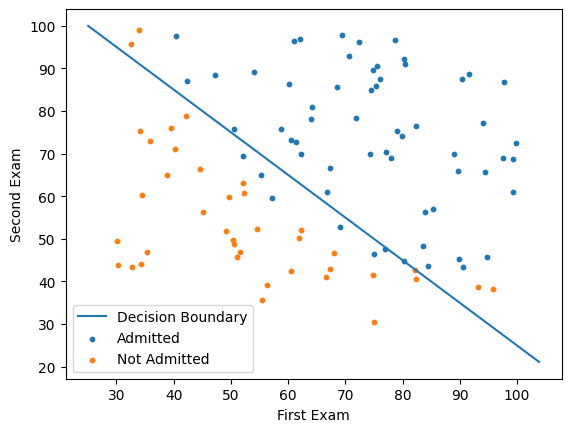

In [7]:
print(f"accuracy: {accuracy(X, y, theta_star_backtrack):.2f}%")
plot_decision_boundary(X, theta_star_backtrack)

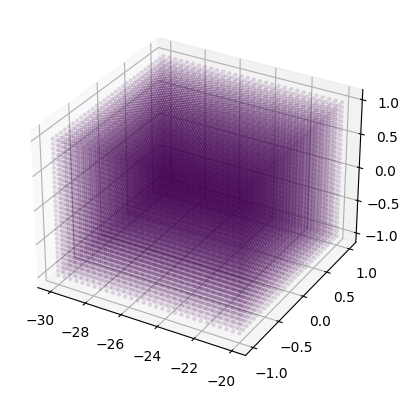

In [22]:
# Prepare data for plots

t1 = np.linspace(-30, -20, 30)
t2 = np.linspace(-1, 1, 30)
t3 = np.linspace(-1, 1, 30)
Xm, Ym, Zm = np.meshgrid(t1, t2, t3)

U = np.zeros((len(t1), len(t2), len(t3)))
for idx1, theta1 in enumerate(t1):
    for idx2, theta2 in enumerate(t2):
        for idx3, theta3 in enumerate(t3):
            U[idx1][idx2][idx3] = objective([theta1, theta2, theta3],X,y)


In [ ]:
# Creating figure
fig = plt.figure()
ax = plt.axes(projection="3d")

# Creating plot
ax.scatter3D(Xm, Ym, Zm, c=U, alpha=0.1, marker='.')
plt.show()

In [21]:
U

array([[[552.62432251, 552.62432251, 552.62432251, ..., 552.62432251,
         552.62432251, 552.62432251],
        [552.62432251, 552.62432251, 552.62432251, ..., 552.62432251,
         552.62432251, 552.62432251],
        [552.62432251, 552.62432251, 552.62432251, ..., 552.62432251,
         552.62432251, 552.62432251],
        ...,
        [552.62432251, 552.62432251, 552.62432251, ..., 552.62432251,
         552.62432251, 552.62432251],
        [552.62432251, 552.62432251, 552.62432251, ..., 552.62432251,
         552.62432251, 552.62432251],
        [552.62432251, 552.62432251, 552.62432251, ..., 552.62432251,
         552.62432251, 552.62432251]],

       [[552.62432251, 552.62432251, 552.62432251, ..., 552.62432251,
         552.62432251, 552.62432251],
        [552.62432251, 552.62432251, 552.62432251, ..., 552.62432251,
         552.62432251, 552.62432251],
        [552.62432251, 552.62432251, 552.62432251, ..., 552.62432251,
         552.62432251, 552.62432251],
        ...,
